A:
0.007421452424529173
0.0002913852361673434
3.825122834790293e-08
7.783486407022493e-17
1.8893196765229843e-34


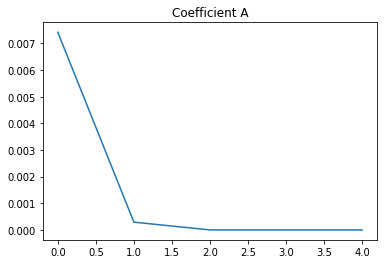

B:
1621.7883661753679
573.8865073109984
202.81300485024784
71.56328082104757
25.205974426439575
8.860066231123104
3.1074213239856503
1.0872064286135765
0.3794050307759733
0.13204366525418568
0.04582637455066186
0.015858951178275797
0.0054725616758501535
0.0018831248450661055
0.000646208692584733
0.0002211672967570383
7.550683871488986e-05
2.571830100179251e-05
8.741165880364339e-06
2.965185511409994e-06
1.004095287343032e-06
3.394860470787055e-07
1.1462319779057617e-07
3.865459959072147e-08
1.3021958468426748e-08
4.382881923798416e-09
1.4740316764611414e-09
4.954116684344053e-10
1.6641049230876344e-10
5.5871110202495434e-11
1.8750721492087578e-11
6.290717260388064e-12
2.109877555057341e-12
7.074718113884403e-13
2.3717706756405037e-13
7.949909211530853e-14
2.6643395995076812e-14
8.928223237776625e-15
2.9915553963064437e-15
1.0022884721407733e-15
3.357825122305015e-16
1.1248589514829964e-16
3.768052154172058e-17
1.2621706690517096e-17
4.22770356584951e-18
1.4160503054211938e-18
4.7428848

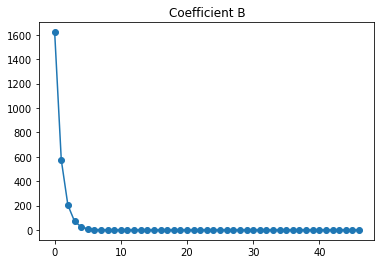

C:
527.4165185380822
32.69577570818048
1.2596669244012733
0.03116031190275445
0.00048393036943076824
4.546350216865125e-06
2.5712374178227815e-08
9.183242574592778e-11
2.225380845238616e-13
3.885746470934443e-16
5.082083998699246e-19


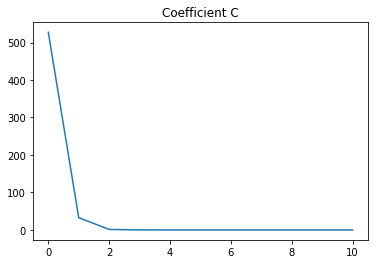

527.4165185380822
17.23235243709031
0.11712549537037203
6.254603291961963e-05
1.7530955451581638e-11
7.849256670975112e-24


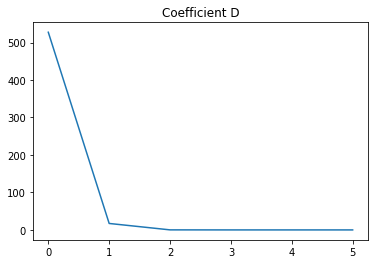

E:
1621.7883661753679
389.2308599286214
54.265510325874686
3.489907102826214
0.07060841021454412
0.0002071464639599436
1.0527621518820043e-08
8.302733725283095e-21


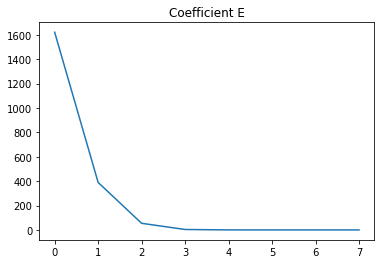

end


In [7]:
import numpy as np
import math
import matplotlib.pyplot as plt

p = 6
x0 = 2
eps = 1e-18
# root = 1.292695719373398(3 or 4)

def go(x):
    return math.exp(x)*math.cos(x)-1

def dgo(x):
    return math.exp(x)*(math.cos(x)-math.sin(x))

def ddgo(x):
    return math.exp(x)*(-2 * math.sin(x))

def sign(x):
    if(go(x) > 0):
        return 1
    else:
        return -1
    
def g(x):
    return go(x) * sign(x)

def dg(x):
    return dgo(x) * sign(x)

def ddg(x):
    return ddgo(x) * sign(x)

def f(x):
    return g(x)**p

def df(x):
    return p * g(x)**(p - 1) * dg(x)

def ddf(x):
    return p * (p - 1) * g(x)**(p - 2) * dg(x)**2 + p * g(x)**(p - 1) * ddg(x)

print("A:")
A = []
x = x0
while(abs(f(x)) > eps and abs(f(x)) < 1/eps):  
    x -= f(x) * df(x)/(df(x)**2 - f(x) * ddf(x))
    print(f(x))
    A.append(f(x))
    
plt.title("Coefficient A")
plt.plot(A)
plt.show() 

print("B:")
B = []
x = x0
while(abs(f(x)) > eps):
    prev = f(x)
    x -= f(x)/df(x)
    if(f(x) >= prev):
        print('this method diverges')
        break
    print(f(x))
    B.append(f(x))

#plt.figure(figsize=(18.5, 10.5))
plt.title("Coefficient B")
plt.plot(B, 'o-')
plt.show()


print("C:")
C = []
x = x0
coef = 1
it = 1
while(abs(f(x)) > eps):
    minval = 1e+9
    minarg = -1
    for i in range(-1,2):
        newval = abs(f(x - (coef + i/it) * f(x) / df(x)))
        if(newval < minval):
            minval = newval
            minarg = i
    coef += minarg/it
    #prev = f(x)
    x -= coef * f(x)/df(x)
    #if(f(x) >= prev):
    #    print('this method diverges')
    #    break
    it += 1
    print(f(x))
    C.append(f(x))
    
plt.title("Coefficient C")
plt.plot(C)
plt.show()
    
D = []
x = x0
coef = 1
while(abs(f(x)) > eps):
    minval = 1e+9
    minarg = -1
    for i in range(-1,2):
        newval = abs(f(x - (coef + i) * f(x) / df(x)))
        if(newval < minval):
            minval = newval
            minarg = i
    coef += minarg
    x -= coef * f(x)/df(x)
    it += 1
    print(f(x))
    D.append(f(x))
    
plt.title("Coefficient D")
plt.plot(D)
plt.show()

print("E:")
E = []
x = x0
coef = 1
while(abs(f(x)) > eps):
    prev = f(x)
    x -= coef * f(x)/df(x)
    a = abs(f(x)/prev)
    minval = 1e+9
    minarg = -1
    for i in range(-1, 2):
        newval = abs(f(x - coef * (1 + i * a**(1/coef)) * f(x) / df(x)))
        if(newval < minval):
            minval = newval
            minarg = i
    coef *= 1 + minarg * a**(1/coef)
    print(f(x))
    E.append(f(x))

plt.title("Coefficient E")
plt.plot(E)
plt.show()


print('end')